# Dataset

In [1]:
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data(path="mnist.npz")

In [2]:
X.shape, y.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
X, X_test = X/255, X_test/255

In [4]:
X_train, y_train = X[:50000], y[:50000]
X_val, y_val = X[50000:], y[50000:]

# Model

In [5]:
from keras import Model, Input
from keras.layers import Dense, Flatten, Reshape
from keras import activations, losses, metrics
from keras.optimizers import Adam

In [6]:
# Encodeur
x1 = Input(shape = (28, 28))
x2 = Flatten()(x1)
x3 = Dense(256, activation = activations.relu)(x2)
x4 = Dense(2, activation = activations.relu)(x3)
encodeur = Model(inputs = x1, outputs = x4)

# Decodeur
x5 = Input(shape = (2, ))
x6 = Dense(256, activation = activations.relu)(x5)
x7 = Dense(784, activation = activations.sigmoid)(x6)
x8 = Reshape(target_shape=(28, 28))(x7)
decodeur = Model(inputs = x5, outputs = x8)

# Autoencodeur
autoencodeur = Model(inputs = x1, outputs = decodeur(x4))

In [7]:
autoencodeur.compile(optimizer = Adam(), loss = losses.binary_crossentropy, metrics = [metrics.binary_crossentropy])
history = autoencodeur.fit(x = X_train, y = X_train, validation_data = (X_val, X_val), batch_size = 256, epochs = 10,
                    verbose = 1)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - binary_crossentropy: 0.2814 - loss: 0.2814 - val_binary_crossentropy: 0.2382 - val_loss: 0.2382
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_crossentropy: 0.2344 - loss: 0.2344 - val_binary_crossentropy: 0.2271 - val_loss: 0.2271
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_crossentropy: 0.2223 - loss: 0.2223 - val_binary_crossentropy: 0.2159 - val_loss: 0.2159
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_crossentropy: 0.2145 - loss: 0.2145 - val_binary_crossentropy: 0.2111 - val_loss: 0.2111
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_crossentropy: 0.2105 - loss: 0.2105 - val_binary_crossentropy: 0.2072 - val_loss: 0.2072
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - binary_crossentropy: 0.2073 - loss: 0.2073 - val_binary_crossentropy: 0.2049 - val_loss: 0.2049
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - binary_crossentropy: 0.2050 - loss: 0.2050 - v

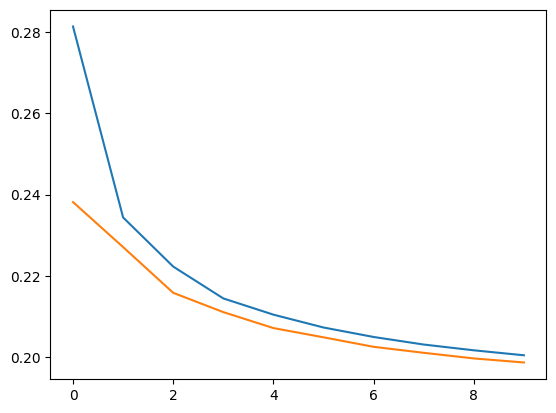

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(len(history.history["binary_crossentropy"])), history.history["binary_crossentropy"])
plt.plot(range(len(history.history["binary_crossentropy"])), history.history["val_binary_crossentropy"])

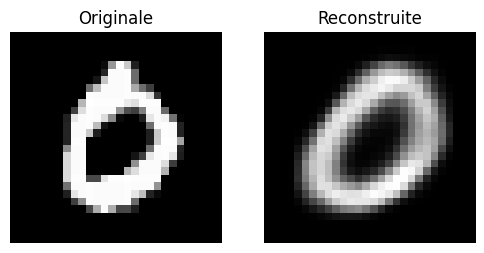

In [9]:
X_pred = autoencodeur.predict(X_test)
from IPython.display import clear_output

for i in range (len(X_pred)) :
    plt.figure(figsize=(6,3))  # taille du canvas (largeur, hauteur)

    # Image originale
    plt.subplot(1, 2, 1)   # 1 ligne, 2 colonnes, 1er subplot
    plt.imshow(X_test[i], cmap="gray")
    plt.title("Originale")
    plt.axis("off")

    # Image reconstruite
    plt.subplot(1, 2, 2)   # 1 ligne, 2 colonnes, 2e subplot
    plt.imshow(X_pred[i], cmap="gray")
    plt.title("Reconstruite")
    plt.axis("off")

    plt.show()

    choix = input("Continuer ? (o/n) : ")

    if choix.lower() == "n":
        break

    clear_output(wait=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step


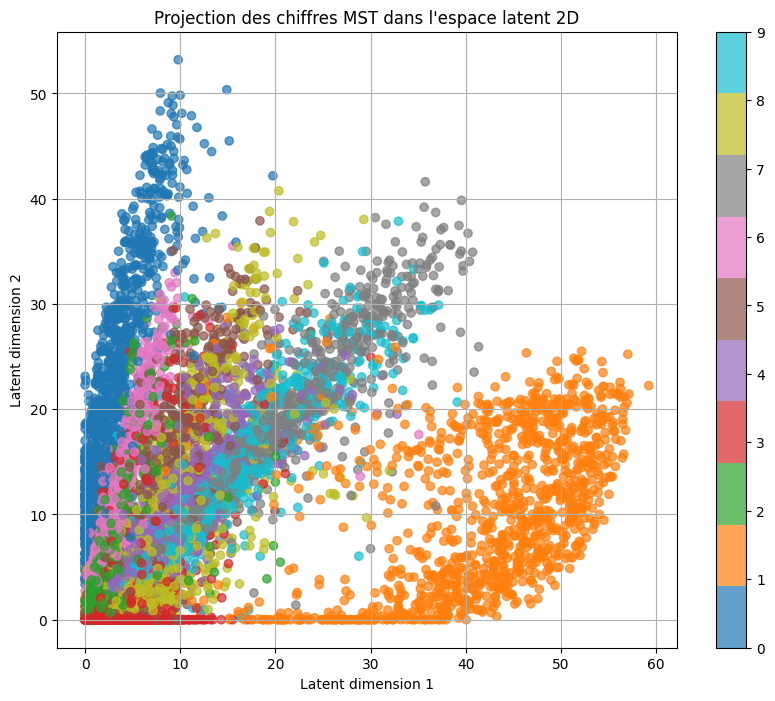

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 5. Encoder les données de test
X_test_latent = encodeur.predict(X_test)

# 6. Scatter plot avec couleur selon les labels y_test
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test_latent[:, 0], X_test_latent[:, 1], c=y_test, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(10))
plt.title("Projection des chiffres MST dans l'espace latent 2D")
plt.xlabel("Latent dimension 1")
plt.ylabel("Latent dimension 2")
plt.grid(True)
plt.show()